# Исследовательский анализ данных

Подключение библиотек

In [40]:
import pandas as pd
import matplotlib
import datetime
import numpy as np

Шаг 1
1. Загрузка данных из csv-файла в датафрейм c помощью библиотеки pandas.
2. Просмотр общей информации о полученном датафрейме.

In [41]:
pd.set_option('display.max_columns', None)
try:
    data = pd.read_csv('/datasets/real_estate_data.csv', sep='\t')
except FileNotFoundError:
    data=pd.read_csv('real_estate_data.csv', sep='\t')
data.info()
data.head(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.00,8,NaN,False,False,25.00,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,NaN,11.0,18.60,1,NaN,False,False,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,NaN,5.0,34.30,4,NaN,False,False,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,False,False,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.00,13,NaN,False,False,41.00,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
5,10,2890000.0,30.40,2018-09-10T00:00:00,1,NaN,12.0,14.40,5,NaN,False,False,9.10,NaN,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0
6,6,3700000.0,37.30,2017-11-02T00:00:00,1,NaN,26.0,10.60,6,NaN,False,False,14.40,1.0,посёлок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0
7,5,7915000.0,71.60,2019-04-18T00:00:00,2,NaN,24.0,NaN,22,NaN,False,False,18.90,2.0,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN
8,20,2900000.0,33.16,2018-05-23T00:00:00,1,NaN,27.0,15.43,26,NaN,False,False,8.81,NaN,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0
9,18,5400000.0,61.00,2017-02-26T00:00:00,3,2.50,9.0,43.60,7,NaN,False,False,6.50,2.0,Санкт-Петербург,50898.0,15008.0,0.0,NaN,0.0,NaN,289.0


3. Построение гистограммы для всех числовых столбцов таблицы на одном графике. 

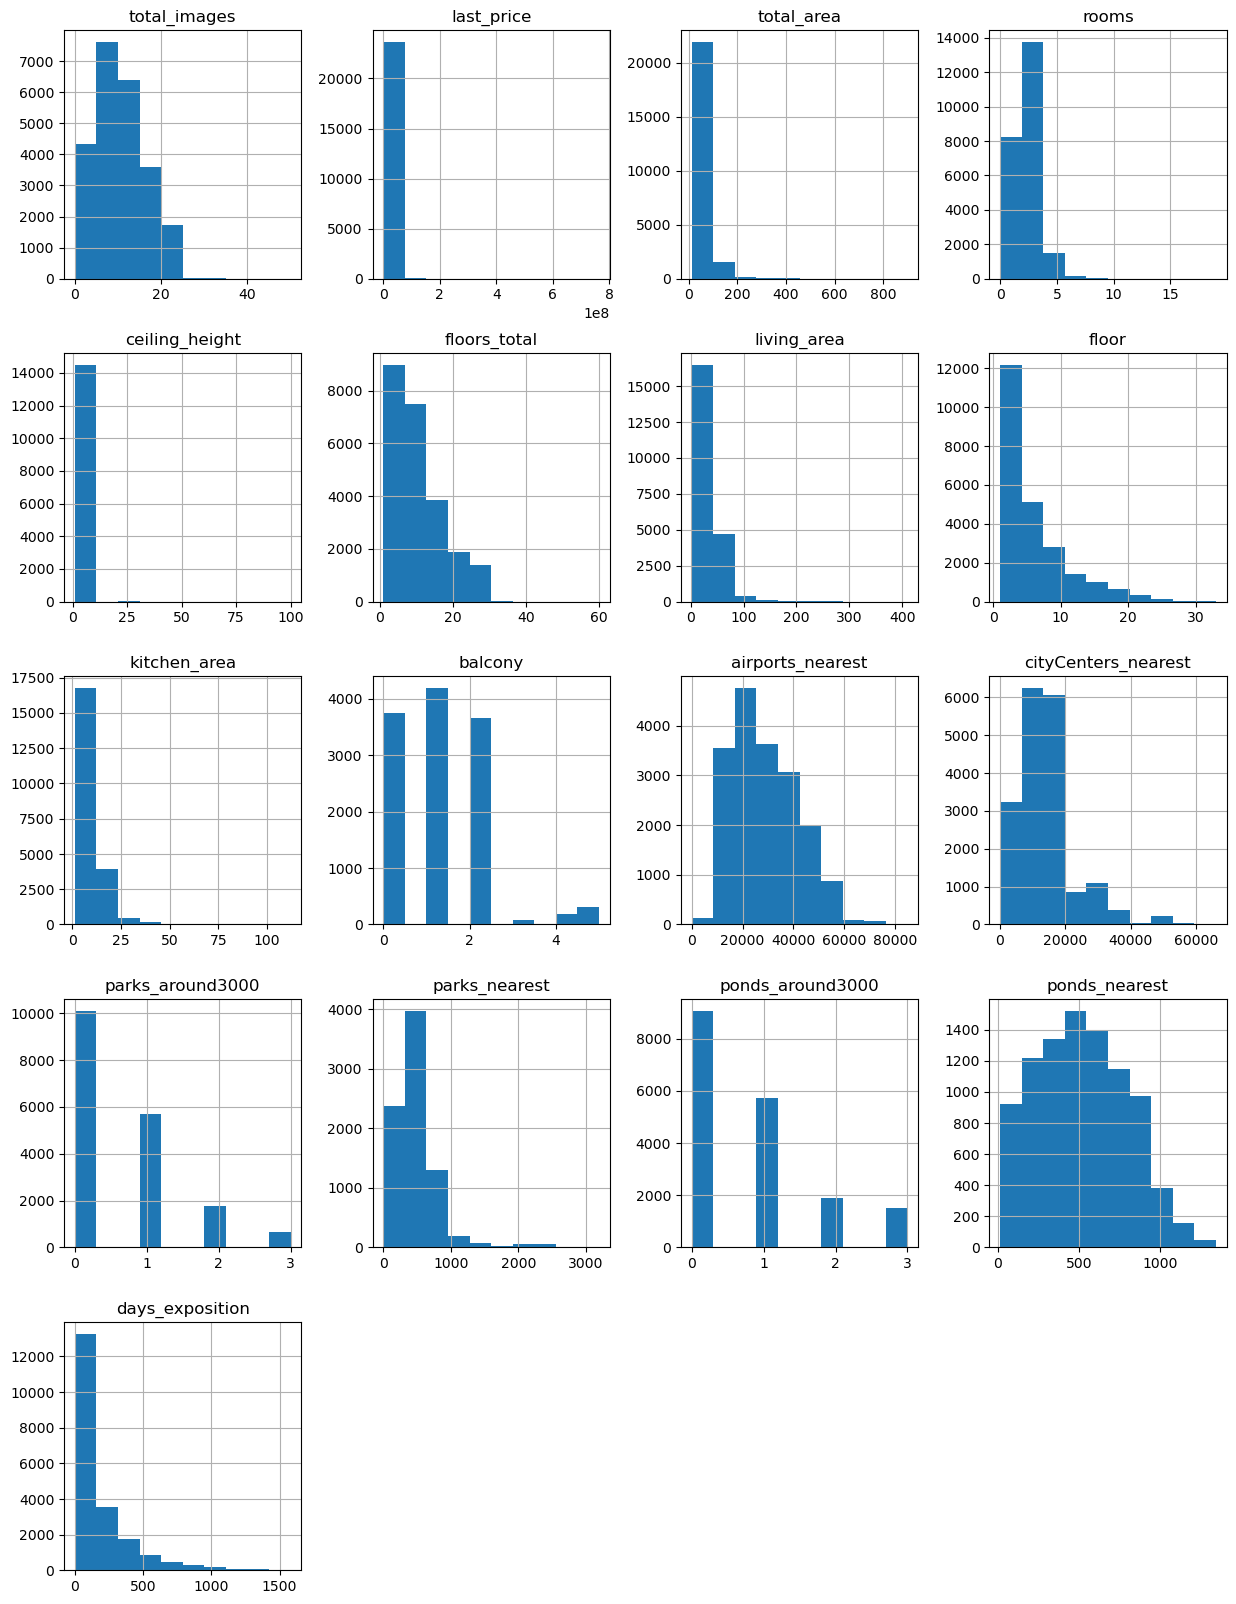

In [42]:
data.hist(figsize=(15, 20));

Для личного удобства переименовал столбцы.

In [43]:
data.columns=['кол-во изображений', 'цена', 'общая площадь', 'дата публикации', 'кол-во комнат', 'высота потолка', 'кол-во этажей', 'жилая площадь', 'этаж', 'квартира', 'студия', 'открытая планировка', 'кухонная зона', 'балкон', 'населенный пункт', 'ближайшие аэрапорты', 'расстояние до центра в м', 'парк в окрестностях 3000', 'самые близкие парки', 'пруды в окрестностях 3000', 'самые близкие пруды', 'кол-во дней публикации']
data.head(10)

,кол-во изображений,цена,общая площадь,дата публикации,кол-во комнат,высота потолка,кол-во этажей,жилая площадь,этаж,квартира,студия,открытая планировка,кухонная зона,балкон,населенный пункт,ближайшие аэрапорты,расстояние до центра в м,парк в окрестностях 3000,самые близкие парки,пруды в окрестностях 3000,самые близкие пруды,кол-во дней публикации
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.00,8,NaN,False,False,25.00,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,NaN,11.0,18.60,1,NaN,False,False,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,NaN,5.0,34.30,4,NaN,False,False,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,False,False,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.00,13,NaN,False,False,41.00,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
5,10,2890000.0,30.40,2018-09-10T00:00:00,1,NaN,12.0,14.40,5,NaN,False,False,9.10,NaN,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0
6,6,3700000.0,37.30,2017-11-02T00:00:00,1,NaN,26.0,10.60,6,NaN,False,False,14.40,1.0,посёлок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0
7,5,7915000.0,71.60,2019-04-18T00:00:00,2,NaN,24.0,NaN,22,NaN,False,False,18.90,2.0,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN
8,20,2900000.0,33.16,2018-05-23T00:00:00,1,NaN,27.0,15.43,26,NaN,False,False,8.81,NaN,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0
9,18,5400000.0,61.00,2017-02-26T00:00:00,3,2.50,9.0,43.60,7,NaN,False,False,6.50,2.0,Санкт-Петербург,50898.0,15008.0,0.0,NaN,0.0,NaN,289.0


Шаг 2
1. Найдем и изучим пропущенные значения в столбцах:
- Определите, в каких столбцах есть пропуски.

In [44]:
skip=data.isnull().sum().sum()
skip

101441

In [45]:
skip_persent1=data.isnull().sum()/len(data)*100
skip_persent1

кол-во изображений            0.000000
цена                          0.000000
общая площадь                 0.000000
дата публикации               0.000000
кол-во комнат                 0.000000
высота потолка               38.799105
кол-во этажей                 0.362885
жилая площадь                 8.029875
этаж                          0.000000
квартира                     88.290645
студия                        0.000000
открытая планировка           0.000000
кухонная зона                 9.612220
балкон                       48.605426
населенный пункт              0.206760
ближайшие аэрапорты          23.384953
расстояние до центра в м     23.287902
парк в окрестностях 3000     23.283683
самые близкие парки          65.909954
пруды в окрестностях 3000    23.283683
самые близкие пруды          61.559559
кол-во дней публикации       13.422507
dtype: float64

- Заполнение пропущенных значений там, где это возможно. Например, если продавец не указал число балконов, то, скорее всего, в его квартире их нет. Такие пропуски можно заменить на число 0. 

In [46]:
data['балкон']=data['балкон'].fillna(0)
data['парк в окрестностях 3000']=data['парк в окрестностях 3000'].fillna(0)
data['пруды в окрестностях 3000']=data['пруды в окрестностях 3000'].fillna(0)
data

,кол-во изображений,цена,общая площадь,дата публикации,кол-во комнат,высота потолка,кол-во этажей,жилая площадь,этаж,квартира,студия,открытая планировка,кухонная зона,балкон,населенный пункт,ближайшие аэрапорты,расстояние до центра в м,парк в окрестностях 3000,самые близкие парки,пруды в окрестностях 3000,самые близкие пруды,кол-во дней публикации
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,NaN,False,False,25.00,0.0,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,False,False,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,NaN,False,False,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,False,False,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,False,False,41.00,0.0,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23694,9,9700000.0,133.81,2017-03-21T00:00:00,3,3.70,5.0,73.3,3,NaN,False,False,13.83,0.0,Санкт-Петербург,24665.0,4232.0,1.0,796.0,3.0,381.0,NaN
23695,14,3100000.0,59.00,2018-01-15T00:00:00,3,NaN,5.0,38.0,4,NaN,False,False,8.50,0.0,Тосно,NaN,NaN,0.0,NaN,0.0,NaN,45.0
23696,18,2500000.0,56.70,2018-02-11T00:00:00,2,NaN,3.0,29.7,1,NaN,False,False,NaN,0.0,село Рождествено,NaN,NaN,0.0,NaN,0.0,NaN,NaN
23697,13,11475000.0,76.75,2017-03-28T00:00:00,2,3.00,17.0,NaN,12,NaN,False,False,23.30,2.0,Санкт-Петербург,39140.0,10364.0,2.0,173.0,3.0,196.0,602.0


Некоторые столбики могли быть незаполнены из за отсутствия информации при заполнении анкеты.
Пропуски в данных могут возникать при ошибке ввода данных. При вводе информации были допущены опечатки или некорректные значения.
Недоступность информации по типу расстояния до центра или парков.
Пропуски появляются из за технических проблем.

In [47]:
skip_persent2=data.isnull().sum()/len(data)*100
skip_persent2

кол-во изображений            0.000000
цена                          0.000000
общая площадь                 0.000000
дата публикации               0.000000
кол-во комнат                 0.000000
высота потолка               38.799105
кол-во этажей                 0.362885
жилая площадь                 8.029875
этаж                          0.000000
квартира                     88.290645
студия                        0.000000
открытая планировка           0.000000
кухонная зона                 9.612220
балкон                        0.000000
населенный пункт              0.206760
ближайшие аэрапорты          23.384953
расстояние до центра в м     23.287902
парк в окрестностях 3000      0.000000
самые близкие парки          65.909954
пруды в окрестностях 3000     0.000000
самые близкие пруды          61.559559
кол-во дней публикации       13.422507
dtype: float64

2. Рассмотрим типы данных в каждом столбце:
- Найдем столбцы, в которых нужно изменить тип данных.
- Преобразуем типы данных в выбранных столбцах.

In [48]:
data.info(), data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   кол-во изображений         23699 non-null  int64  
 1   цена                       23699 non-null  float64
 2   общая площадь              23699 non-null  float64
 3   дата публикации            23699 non-null  object 
 4   кол-во комнат              23699 non-null  int64  
 5   высота потолка             14504 non-null  float64
 6   кол-во этажей              23613 non-null  float64
 7   жилая площадь              21796 non-null  float64
 8   этаж                       23699 non-null  int64  
 9   квартира                   2775 non-null   object 
 10  студия                     23699 non-null  bool   
 11  открытая планировка        23699 non-null  bool   
 12  кухонная зона              21421 non-null  float64
 13  балкон                     23699 non-null  flo

(None,
    кол-во изображений        цена  общая площадь      дата публикации  \
 0                  20  13000000.0          108.0  2019-03-07T00:00:00   
 1                   7   3350000.0           40.4  2018-12-04T00:00:00   
 2                  10   5196000.0           56.0  2015-08-20T00:00:00   
 3                   0  64900000.0          159.0  2015-07-24T00:00:00   
 4                   2  10000000.0          100.0  2018-06-19T00:00:00   
 
    кол-во комнат  высота потолка  кол-во этажей  жилая площадь  этаж квартира  \
 0              3            2.70           16.0           51.0     8      NaN   
 1              1             NaN           11.0           18.6     1      NaN   
 2              2             NaN            5.0           34.3     4      NaN   
 3              3             NaN           14.0            NaN     9      NaN   
 4              2            3.03           14.0           32.0    13      NaN   
 
    студия  открытая планировка  кухонная зона  балко

In [49]:
convert_type={'цена': int,
             'балкон' : int,
             'парк в окрестностях 3000' : int,
             'пруды в окрестностях 3000' : int,
             }
data['дата публикации']=pd.to_datetime(data['дата публикации'], format='%Y-%m-%dT%H:%M:%S')
#data['кол-во этажей'] = data['кол-во этажей'].astype(int)
data=data.astype(convert_type)
data.info()
data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   кол-во изображений         23699 non-null  int64         
 1   цена                       23699 non-null  int32         
 2   общая площадь              23699 non-null  float64       
 3   дата публикации            23699 non-null  datetime64[ns]
 4   кол-во комнат              23699 non-null  int64         
 5   высота потолка             14504 non-null  float64       
 6   кол-во этажей              23613 non-null  float64       
 7   жилая площадь              21796 non-null  float64       
 8   этаж                       23699 non-null  int64         
 9   квартира                   2775 non-null   object        
 10  студия                     23699 non-null  bool          
 11  открытая планировка        23699 non-null  bool          
 12  кухо

,кол-во изображений,цена,общая площадь,дата публикации,кол-во комнат,высота потолка,кол-во этажей,жилая площадь,этаж,квартира,студия,открытая планировка,кухонная зона,балкон,населенный пункт,ближайшие аэрапорты,расстояние до центра в м,парк в окрестностях 3000,самые близкие парки,пруды в окрестностях 3000,самые близкие пруды,кол-во дней публикации
0,20,13000000,108.0,2019-03-07,3,2.70,16.0,51.0,8,NaN,False,False,25.0,0,Санкт-Петербург,18863.0,16028.0,1,482.0,2,755.0,NaN
1,7,3350000,40.4,2018-12-04,1,NaN,11.0,18.6,1,NaN,False,False,11.0,2,посёлок Шушары,12817.0,18603.0,0,NaN,0,NaN,81.0
2,10,5196000,56.0,2015-08-20,2,NaN,5.0,34.3,4,NaN,False,False,8.3,0,Санкт-Петербург,21741.0,13933.0,1,90.0,2,574.0,558.0
3,0,64900000,159.0,2015-07-24,3,NaN,14.0,NaN,9,NaN,False,False,NaN,0,Санкт-Петербург,28098.0,6800.0,2,84.0,3,234.0,424.0
4,2,10000000,100.0,2018-06-19,2,3.03,14.0,32.0,13,NaN,False,False,41.0,0,Санкт-Петербург,31856.0,8098.0,2,112.0,1,48.0,121.0


- Для того чтобы экономить количество памяти. Могу предположить, что цены квартир указываются без копеек. 

- Кол-во балконов не бывает дробным. Расстояние в метрах не имеет смысла в нашем случае указывать с сантиметрами. 

- Кол-во этажей тоже не может быть дробным но я долго с ним провозился и почему то не смог поменять тип.

3. Изучим уникальные значения в столбце с названиями и устраним неявные дубликаты.

In [50]:
data['населенный пункт'].value_counts()

Санкт-Петербург                    15721
посёлок Мурино                       522
посёлок Шушары                       440
Всеволожск                           398
Пушкин                               369
                                   ...  
поселок Каложицы                       1
посёлок Платформа 69-й километр        1
поселок Почап                          1
поселок Гончарово                      1
посёлок Дзержинского                   1
Name: населенный пункт, Length: 364, dtype: int64

In [51]:
data['населенный пункт'].unique()

array(['Санкт-Петербург', 'посёлок Шушары', 'городской посёлок Янино-1',
       'посёлок Парголово', 'посёлок Мурино', 'Ломоносов', 'Сертолово',
       'Петергоф', 'Пушкин', 'деревня Кудрово', 'Коммунар', 'Колпино',
       'поселок городского типа Красный Бор', 'Гатчина', 'поселок Мурино',
       'деревня Фёдоровское', 'Выборг', 'Кронштадт', 'Кировск',
       'деревня Новое Девяткино', 'посёлок Металлострой',
       'посёлок городского типа Лебяжье',
       'посёлок городского типа Сиверский', 'поселок Молодцово',
       'поселок городского типа Кузьмоловский',
       'садовое товарищество Новая Ропша', 'Павловск',
       'деревня Пикколово', 'Всеволожск', 'Волхов', 'Кингисепп',
       'Приозерск', 'Сестрорецк', 'деревня Куттузи', 'посёлок Аннино',
       'поселок городского типа Ефимовский', 'посёлок Плодовое',
       'деревня Заклинье', 'поселок Торковичи', 'поселок Первомайское',
       'Красное Село', 'посёлок Понтонный', 'Сясьстрой', 'деревня Старая',
       'деревня Лесколово', '

In [52]:
data['населенный пункт'] = data['населенный пункт'].str.replace('поселок','посёлок')
data['населенный пункт'].sort_values().unique()

array(['Бокситогорск', 'Волосово', 'Волхов', 'Всеволожск', 'Выборг',
       'Высоцк', 'Гатчина', 'Зеленогорск', 'Ивангород', 'Каменногорск',
       'Кингисепп', 'Кириши', 'Кировск', 'Колпино', 'Коммунар',
       'Красное Село', 'Кронштадт', 'Кудрово', 'Лодейное Поле',
       'Ломоносов', 'Луга', 'Любань', 'Мурино', 'Никольское',
       'Новая Ладога', 'Отрадное', 'Павловск', 'Петергоф', 'Пикалёво',
       'Подпорожье', 'Приморск', 'Приозерск', 'Пушкин', 'Санкт-Петербург',
       'Светогорск', 'Сертолово', 'Сестрорецк', 'Сланцы', 'Сосновый Бор',
       'Сясьстрой', 'Тихвин', 'Тосно', 'Шлиссельбург',
       'городской посёлок Большая Ижора', 'городской посёлок Будогощь',
       'городской посёлок Виллози', 'городской посёлок Лесогорский',
       'городской посёлок Мга', 'городской посёлок Назия',
       'городской посёлок Новоселье', 'городской посёлок Павлово',
       'городской посёлок Рощино', 'городской посёлок Свирьстрой',
       'городской посёлок Советский', 'городской посёлок Фёд

In [53]:
data = data.replace({'населенный пункт':{'Никольское': 'село Никольское', 
                                         'городской посёлок Советский': 'посёлок городского типа Советский', 
                                         'городской посёлок Большая Ижора': 'посёлок городского типа Большая Ижора', 
                                         'городской посёлок Лесогорский': 'посёлок городского типа Лесогорский', 
                                         'посёлок Рябово': 'посёлок городского типа Рябово', 
                                         'городской посёлок Мга': 'посёлок городского типа Мга', 
                                         'городской посёлок Павлово': 'посёлок городского типа Павлово', 
                                         'городской посёлок Назия': 'посёлок городского типа Назия', 
                                         'коттеджный посёлок Лесное': 'посёлок Лесное', 
                                         'Мурино': 'посёлок Мурино', 
                                         'Любань': 'посёлок Любань', 
                                         'городской посёлок Рощино': 'посёлок городского типа Рощино', 
                                         'деревня Кудрово': 'Кудрово'}})


In [54]:
data['населенный пункт'].sort_values().unique()

array(['Бокситогорск', 'Волосово', 'Волхов', 'Всеволожск', 'Выборг',
       'Высоцк', 'Гатчина', 'Зеленогорск', 'Ивангород', 'Каменногорск',
       'Кингисепп', 'Кириши', 'Кировск', 'Колпино', 'Коммунар',
       'Красное Село', 'Кронштадт', 'Кудрово', 'Лодейное Поле',
       'Ломоносов', 'Луга', 'Новая Ладога', 'Отрадное', 'Павловск',
       'Петергоф', 'Пикалёво', 'Подпорожье', 'Приморск', 'Приозерск',
       'Пушкин', 'Санкт-Петербург', 'Светогорск', 'Сертолово',
       'Сестрорецк', 'Сланцы', 'Сосновый Бор', 'Сясьстрой', 'Тихвин',
       'Тосно', 'Шлиссельбург', 'городской посёлок Будогощь',
       'городской посёлок Виллози', 'городской посёлок Новоселье',
       'городской посёлок Свирьстрой', 'городской посёлок Фёдоровское',
       'городской посёлок Янино-1', 'деревня Агалатово', 'деревня Аро',
       'деревня Батово', 'деревня Бегуницы', 'деревня Белогорка',
       'деревня Большая Вруда', 'деревня Большая Пустомержа',
       'деревня Большие Колпаны', 'деревня Большое Рейзино'

Шаг 3. Добавим в таблицу новые столбцы со следующими параметрами:
- цена одного квадратного метра (нужно поделить стоимость объекта на его общую площадь, а затем округлить до двух знаков после запятой);

In [55]:
data['цена м^2']=data['цена']/data['общая площадь']
data['цена м^2']=data['цена м^2'].round(2)
data['цена м^2']

0        120370.37
1         82920.79
2         92785.71
3        408176.10
4        100000.00
           ...    
23694     72490.85
23695     52542.37
23696     44091.71
23697    149511.40
23698     41795.67
Name: цена м^2, Length: 23699, dtype: float64

- день недели публикации объявления (0 — понедельник, 1 — вторник и так далее);
- месяц публикации объявления;
- год публикации объявления;

In [56]:
data['дата публикации']

0       2019-03-07
1       2018-12-04
2       2015-08-20
3       2015-07-24
4       2018-06-19
           ...    
23694   2017-03-21
23695   2018-01-15
23696   2018-02-11
23697   2017-03-28
23698   2017-07-21
Name: дата публикации, Length: 23699, dtype: datetime64[ns]

In [57]:
data['день публикации']=pd.DatetimeIndex(data['дата публикации']).weekday
data['месяц публикации']=pd.DatetimeIndex(data['дата публикации']).month
data['год публикации']=pd.DatetimeIndex(data['дата публикации']).year
data.head()

,кол-во изображений,цена,общая площадь,дата публикации,кол-во комнат,высота потолка,кол-во этажей,жилая площадь,этаж,квартира,студия,открытая планировка,кухонная зона,балкон,населенный пункт,ближайшие аэрапорты,расстояние до центра в м,парк в окрестностях 3000,самые близкие парки,пруды в окрестностях 3000,самые близкие пруды,кол-во дней публикации,цена м^2,день публикации,месяц публикации,год публикации
0,20,13000000,108.0,2019-03-07,3,2.70,16.0,51.0,8,NaN,False,False,25.0,0,Санкт-Петербург,18863.0,16028.0,1,482.0,2,755.0,NaN,120370.37,3,3,2019
1,7,3350000,40.4,2018-12-04,1,NaN,11.0,18.6,1,NaN,False,False,11.0,2,посёлок Шушары,12817.0,18603.0,0,NaN,0,NaN,81.0,82920.79,1,12,2018
2,10,5196000,56.0,2015-08-20,2,NaN,5.0,34.3,4,NaN,False,False,8.3,0,Санкт-Петербург,21741.0,13933.0,1,90.0,2,574.0,558.0,92785.71,3,8,2015
3,0,64900000,159.0,2015-07-24,3,NaN,14.0,NaN,9,NaN,False,False,NaN,0,Санкт-Петербург,28098.0,6800.0,2,84.0,3,234.0,424.0,408176.10,4,7,2015
4,2,10000000,100.0,2018-06-19,2,3.03,14.0,32.0,13,NaN,False,False,41.0,0,Санкт-Петербург,31856.0,8098.0,2,112.0,1,48.0,121.0,100000.00,1,6,2018


- тип этажа квартиры (значения — «‎первый», «последний», «другой»);

In [58]:
def group_floor(row):
    if row['этаж'] == 1:
        return 'первый'
    elif row['этаж'] == row['кол-во этажей']:
        return 'последний'
    else:
        return 'другой'

data['тип этажа квартиры'] = data.apply(group_floor, axis=1)

data

,кол-во изображений,цена,общая площадь,дата публикации,кол-во комнат,высота потолка,кол-во этажей,жилая площадь,этаж,квартира,студия,открытая планировка,кухонная зона,балкон,населенный пункт,ближайшие аэрапорты,расстояние до центра в м,парк в окрестностях 3000,самые близкие парки,пруды в окрестностях 3000,самые близкие пруды,кол-во дней публикации,цена м^2,день публикации,месяц публикации,год публикации,тип этажа квартиры
0,20,13000000,108.00,2019-03-07,3,2.70,16.0,51.0,8,NaN,False,False,25.00,0,Санкт-Петербург,18863.0,16028.0,1,482.0,2,755.0,NaN,120370.37,3,3,2019,другой
1,7,3350000,40.40,2018-12-04,1,NaN,11.0,18.6,1,NaN,False,False,11.00,2,посёлок Шушары,12817.0,18603.0,0,NaN,0,NaN,81.0,82920.79,1,12,2018,первый
2,10,5196000,56.00,2015-08-20,2,NaN,5.0,34.3,4,NaN,False,False,8.30,0,Санкт-Петербург,21741.0,13933.0,1,90.0,2,574.0,558.0,92785.71,3,8,2015,другой
3,0,64900000,159.00,2015-07-24,3,NaN,14.0,NaN,9,NaN,False,False,NaN,0,Санкт-Петербург,28098.0,6800.0,2,84.0,3,234.0,424.0,408176.10,4,7,2015,другой
4,2,10000000,100.00,2018-06-19,2,3.03,14.0,32.0,13,NaN,False,False,41.00,0,Санкт-Петербург,31856.0,8098.0,2,112.0,1,48.0,121.0,100000.00,1,6,2018,другой
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23694,9,9700000,133.81,2017-03-21,3,3.70,5.0,73.3,3,NaN,False,False,13.83,0,Санкт-Петербург,24665.0,4232.0,1,796.0,3,381.0,NaN,72490.85,1,3,2017,другой
23695,14,3100000,59.00,2018-01-15,3,NaN,5.0,38.0,4,NaN,False,False,8.50,0,Тосно,NaN,NaN,0,NaN,0,NaN,45.0,52542.37,0,1,2018,другой
23696,18,2500000,56.70,2018-02-11,2,NaN,3.0,29.7,1,NaN,False,False,NaN,0,село Рождествено,NaN,NaN,0,NaN,0,NaN,NaN,44091.71,6,2,2018,первый
23697,13,11475000,76.75,2017-03-28,2,3.00,17.0,NaN,12,NaN,False,False,23.30,2,Санкт-Петербург,39140.0,10364.0,2,173.0,3,196.0,602.0,149511.40,1,3,2017,другой


- расстояние до центра города в километрах (переведите из м в км и округлите до ближайших целых значений).

In [59]:
data['расстояние до центра в км']=data['расстояние до центра в м']/1000
data['расстояние до центра в км']=data['расстояние до центра в км'].round(2)
data['расстояние до центра в км']

0        16.03
1        18.60
2        13.93
3         6.80
4         8.10
         ...  
23694     4.23
23695      NaN
23696      NaN
23697    10.36
23698      NaN
Name: расстояние до центра в км, Length: 23699, dtype: float64

Шаг 4. Проведем исследовательский анализ данных:

Изучим перечисленные ниже параметры объектов и построим отдельные гистограммы для каждого из этих параметров. 
- общая площадь;
- жилая площадь;
- площадь кухни;
- цена объекта;
- количество комнат;
- высота потолков;
- тип этажа квартиры («первый», «последний», «другой»);
- общее количество этажей в доме;
- расстояние до центра города в метрах;
- расстояние до ближайшего парка

900.0

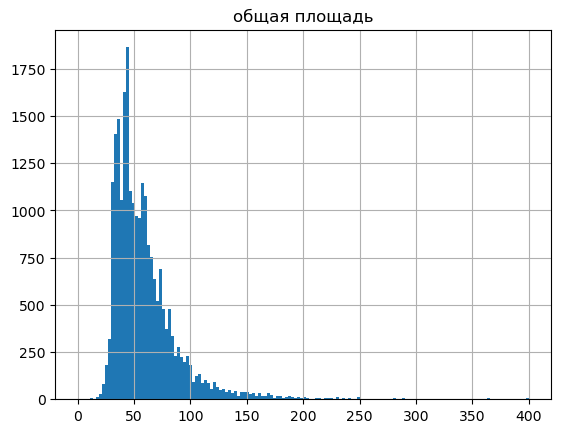

In [60]:
data.hist('общая площадь', bins=150, range=(0,400))
len(data[data['общая площадь']>500])
data['общая площадь'].min() 
data['общая площадь'].max()

In [61]:
data['общая площадь'].sort_values().unique()

array([ 12. ,  13. ,  13.2, ..., 631. , 631.2, 900. ])

In [62]:
data[data['общая площадь']==900]
data[data['общая площадь']==12]

,кол-во изображений,цена,общая площадь,дата публикации,кол-во комнат,высота потолка,кол-во этажей,жилая площадь,этаж,квартира,студия,открытая планировка,кухонная зона,балкон,населенный пункт,ближайшие аэрапорты,расстояние до центра в м,парк в окрестностях 3000,самые близкие парки,пруды в окрестностях 3000,самые близкие пруды,кол-во дней публикации,цена м^2,день публикации,месяц публикации,год публикации,тип этажа квартиры,расстояние до центра в км
19904,4,2400000,12.0,2017-07-19,1,2.55,5.0,10.0,2,NaN,False,False,NaN,0,Санкт-Петербург,21314.0,964.0,1,886.0,2,45.0,200.0,200000.0,2,7,2017,другой,0.96


In [63]:
data=data[data['общая площадь']<200]
data['общая площадь'].sort_values().unique()

array([ 12. ,  13. ,  13.2, ..., 198.1, 198.9, 199.2])

164.7

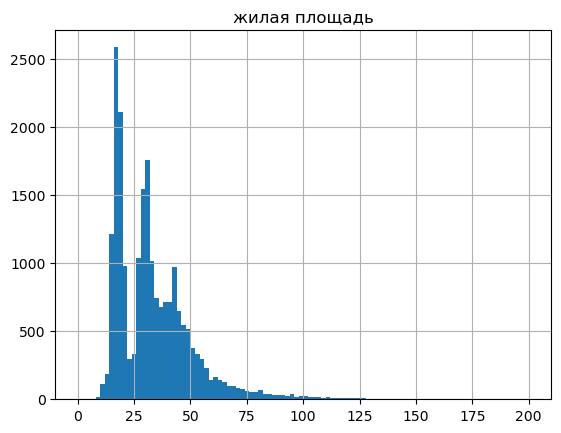

In [64]:
data.hist('жилая площадь', bins=100, range=(0,200))
data['жилая площадь'].min()
data['жилая площадь'].max()

array([[<Axes: title={'center': 'кухонная зона'}>]], dtype=object)

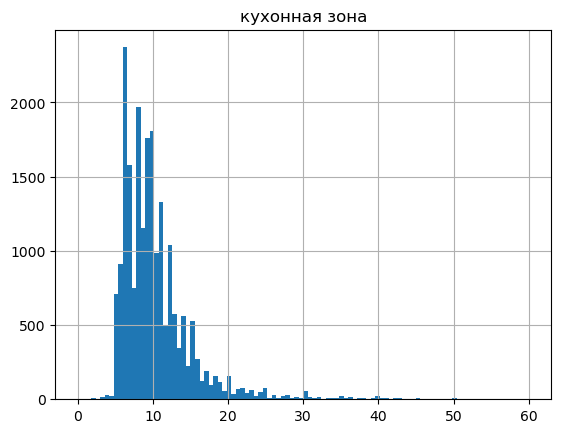

In [65]:
data.hist('кухонная зона', bins=100, range=(0,60))

In [90]:
#data.loc[data['цена'] < 25000, 'цена'] = data.loc[data['цена'] < 25000, 'цена']*10
#data.hist('цена', bins=75, range=(0, 200))

In [67]:
data['цена'].max()

330000000

In [68]:
data[data['цена']==763000000]

,кол-во изображений,цена,общая площадь,дата публикации,кол-во комнат,высота потолка,кол-во этажей,жилая площадь,этаж,квартира,студия,открытая планировка,кухонная зона,балкон,населенный пункт,ближайшие аэрапорты,расстояние до центра в м,парк в окрестностях 3000,самые близкие парки,пруды в окрестностях 3000,самые близкие пруды,кол-во дней публикации,цена м^2,день публикации,месяц публикации,год публикации,тип этажа квартиры,расстояние до центра в км


In [69]:
data['цена'].min()

121900

In [70]:
data[data['цена']==121900]

,кол-во изображений,цена,общая площадь,дата публикации,кол-во комнат,высота потолка,кол-во этажей,жилая площадь,этаж,квартира,студия,открытая планировка,кухонная зона,балкон,населенный пункт,ближайшие аэрапорты,расстояние до центра в м,парк в окрестностях 3000,самые близкие парки,пруды в окрестностях 3000,самые близкие пруды,кол-во дней публикации,цена м^2,день публикации,месяц публикации,год публикации,тип этажа квартиры,расстояние до центра в км
8793,7,121900,109.0,2019-03-20,2,2.75,25.0,32.0,25,NaN,False,False,40.5,0,Санкт-Петербург,36421.0,9176.0,1,805.0,0,NaN,8.0,111.83,2,3,2019,последний,9.18


In [71]:
data.loc[data['цена'] == 121900, 'цена'] = data.loc[data['цена'] == 25000, 'цена']*100

C:\Users\User\AppData\Local\Temp\ipykernel_23560\1965174509.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.loc[data['цена'] == 121900, 'цена'] = data.loc[data['цена'] == 25000, 'цена']*100


In [72]:
data['цена'].min()

430000.0

In [73]:
data['цена'].sort_values().unique()

array([4.300000e+05, 4.400000e+05, 4.500000e+05, ..., 2.892384e+08,
       3.300000e+08,          nan])

In [74]:
data[data['цена']==430000]
data[data['цена']==440000]
data[data['цена']==420000000]
data[data['цена']==401300000]

,кол-во изображений,цена,общая площадь,дата публикации,кол-во комнат,высота потолка,кол-во этажей,жилая площадь,этаж,квартира,студия,открытая планировка,кухонная зона,балкон,населенный пункт,ближайшие аэрапорты,расстояние до центра в м,парк в окрестностях 3000,самые близкие парки,пруды в окрестностях 3000,самые близкие пруды,кол-во дней публикации,цена м^2,день публикации,месяц публикации,год публикации,тип этажа квартиры,расстояние до центра в км


array([ 3,  1,  2,  4,  5,  6, 11,  7,  8], dtype=int64)

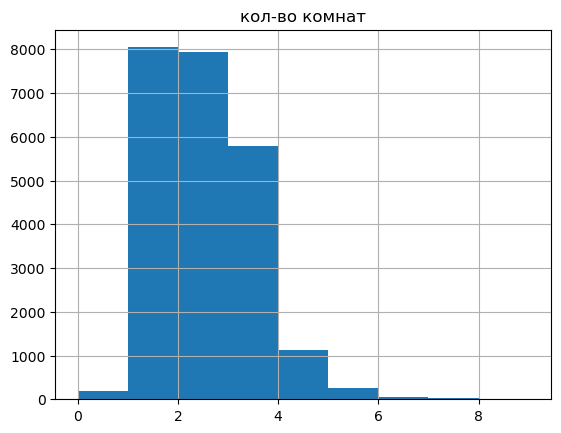

In [75]:
data.hist('кол-во комнат', bins=np.arange(0, 10, 1))
data['кол-во комнат'].min()
len(data[data['кол-во комнат']==0])
data=data[data['кол-во комнат']!=0]
data['кол-во комнат'].unique()

In [76]:
data[data['кол-во комнат']==11]
data=data[data['кол-во комнат']<11]
data['кол-во комнат'].unique()

array([3, 1, 2, 4, 5, 6, 7, 8], dtype=int64)

In [77]:
data[data['кол-во комнат']==19]
data[data['кол-во комнат']==1]
data[data['кол-во комнат']==16]

,кол-во изображений,цена,общая площадь,дата публикации,кол-во комнат,высота потолка,кол-во этажей,жилая площадь,этаж,квартира,студия,открытая планировка,кухонная зона,балкон,населенный пункт,ближайшие аэрапорты,расстояние до центра в м,парк в окрестностях 3000,самые близкие парки,пруды в окрестностях 3000,самые близкие пруды,кол-во дней публикации,цена м^2,день публикации,месяц публикации,год публикации,тип этажа квартиры,расстояние до центра в км


array([  2.7 ,    nan,   3.03,   2.5 ,   2.67,   2.56,   3.05,   2.75,
         2.6 ,   2.9 ,   2.8 ,   2.55,   3.  ,   2.65,   3.2 ,   2.61,
         3.25,   3.45,   2.77,   2.85,   2.64,   2.57,   4.15,   3.3 ,
         2.71,   4.  ,   2.47,   2.73,   2.84,   3.1 ,   2.34,   3.4 ,
         3.5 ,   3.06,   2.72,   2.54,   2.51,   2.78,   2.76,  25.  ,
         2.58,   3.7 ,   2.52,   2.87,   2.66,   2.59,   2.  ,   2.45,
         3.6 ,   2.92,   3.11,   3.13,   3.8 ,   3.15,   3.55,   3.62,
         3.12,   2.53,   2.74,   2.96,   2.46,   5.  ,   2.79,   2.95,
         4.06,   2.94,   3.54,   3.53,   2.83,   2.4 ,   3.38,   3.01,
         3.65,   3.18,   3.35,   2.3 ,   2.48,   2.62,   3.57,   2.82,
         3.98,   2.63,   3.83,   3.52,   3.75,   2.88,   3.67,   3.66,
         4.19,   3.95,   3.24,   4.8 ,   4.5 ,   4.2 ,   3.36,  32.  ,
         3.08,   3.68,   3.07,   3.37,   3.09,   8.  ,   3.16,   3.26,
         3.34,   2.81,   3.44,   2.97,   4.37,   2.68,   3.9 ,   3.22,
      

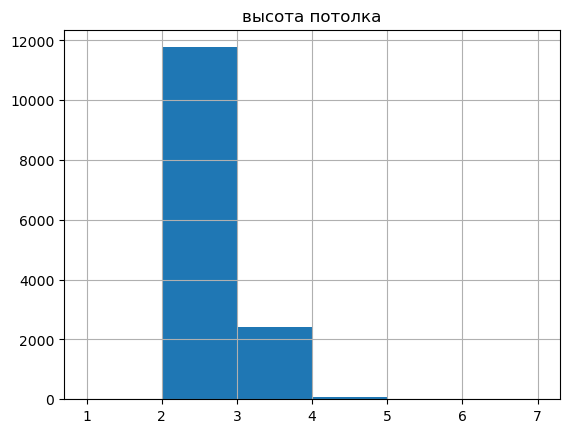

In [78]:
data.hist('высота потолка', bins=np.arange(1, 8, 1))
data['высота потолка'].max()
data['высота потолка'].unique()

In [79]:
data.loc[data['высота потолка'] >= 8, 'высота потолка'] = data.loc[data['высота потолка'] >= 8, 'высота потолка'] / 10
data['высота потолка'].unique()

array([ 2.7 ,   nan,  3.03,  2.5 ,  2.67,  2.56,  3.05,  2.75,  2.6 ,
        2.9 ,  2.8 ,  2.55,  3.  ,  2.65,  3.2 ,  2.61,  3.25,  3.45,
        2.77,  2.85,  2.64,  2.57,  4.15,  3.3 ,  2.71,  4.  ,  2.47,
        2.73,  2.84,  3.1 ,  2.34,  3.4 ,  3.5 ,  3.06,  2.72,  2.54,
        2.51,  2.78,  2.76,  2.58,  3.7 ,  2.52,  2.87,  2.66,  2.59,
        2.  ,  2.45,  3.6 ,  2.92,  3.11,  3.13,  3.8 ,  3.15,  3.55,
        3.62,  3.12,  2.53,  2.74,  2.96,  2.46,  5.  ,  2.79,  2.95,
        4.06,  2.94,  3.54,  3.53,  2.83,  2.4 ,  3.38,  3.01,  3.65,
        3.18,  3.35,  2.3 ,  2.48,  2.62,  3.57,  2.82,  3.98,  2.63,
        3.83,  3.52,  3.75,  2.88,  3.67,  3.66,  4.19,  3.95,  3.24,
        4.8 ,  4.5 ,  4.2 ,  3.36,  3.08,  3.68,  3.07,  3.37,  3.09,
        0.8 ,  3.16,  3.26,  3.34,  2.81,  3.44,  2.97,  4.37,  2.68,
        3.9 ,  3.22,  3.27,  4.1 ,  2.93,  3.46,  3.47,  3.33,  3.63,
        3.14,  3.32,  1.2 ,  0.83,  2.98,  2.86,  3.17,  3.28,  3.04,
        5.5 ,  3.84,

In [80]:
data[data['высота потолка']==1]
data=data.loc[data['высота потолка']!=1]
data=data.loc[data['высота потолка']!=0.8]
data=data.loc[data['высота потолка']!=1.2]
data=data.loc[data['высота потолка']!=1.4]
data=data.loc[data['высота потолка']!=1.03]
data['высота потолка'].unique()

array([ 2.7 ,   nan,  3.03,  2.5 ,  2.67,  2.56,  3.05,  2.75,  2.6 ,
        2.9 ,  2.8 ,  2.55,  3.  ,  2.65,  3.2 ,  2.61,  3.25,  3.45,
        2.77,  2.85,  2.64,  2.57,  4.15,  3.3 ,  2.71,  4.  ,  2.47,
        2.73,  2.84,  3.1 ,  2.34,  3.4 ,  3.5 ,  3.06,  2.72,  2.54,
        2.51,  2.78,  2.76,  2.58,  3.7 ,  2.52,  2.87,  2.66,  2.59,
        2.  ,  2.45,  3.6 ,  2.92,  3.11,  3.13,  3.8 ,  3.15,  3.55,
        3.62,  3.12,  2.53,  2.74,  2.96,  2.46,  5.  ,  2.79,  2.95,
        4.06,  2.94,  3.54,  3.53,  2.83,  2.4 ,  3.38,  3.01,  3.65,
        3.18,  3.35,  2.3 ,  2.48,  2.62,  3.57,  2.82,  3.98,  2.63,
        3.83,  3.52,  3.75,  2.88,  3.67,  3.66,  4.19,  3.95,  3.24,
        4.8 ,  4.5 ,  4.2 ,  3.36,  3.08,  3.68,  3.07,  3.37,  3.09,
        3.16,  3.26,  3.34,  2.81,  3.44,  2.97,  4.37,  2.68,  3.9 ,
        3.22,  3.27,  4.1 ,  2.93,  3.46,  3.47,  3.33,  3.63,  3.14,
        3.32,  0.83,  2.98,  2.86,  3.17,  3.28,  3.04,  5.5 ,  3.84,
        3.23,  3.02,

<Axes: xlabel='тип этажа квартиры', ylabel='count'>

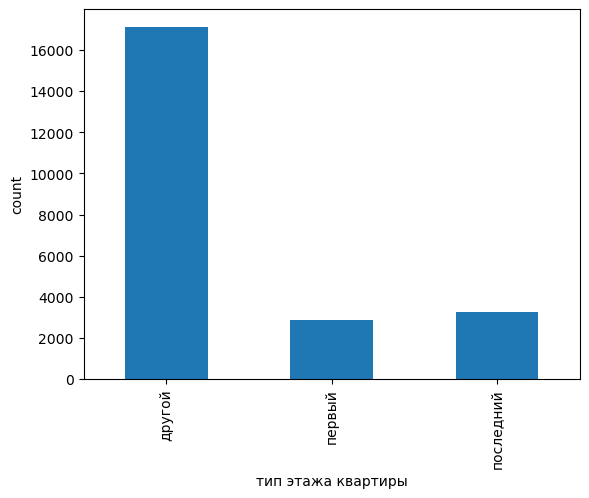

In [81]:
data.groupby(by='тип этажа квартиры')['тип этажа квартиры'].count().plot(kind='bar', ylabel = 'count')

60.0

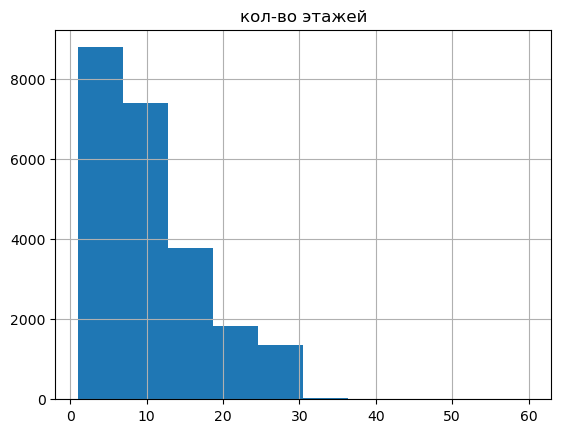

In [82]:
data.hist('кол-во этажей')
data['кол-во этажей'].min()
data['кол-во этажей'].max()

In [83]:
data[data['кол-во этажей']==60.0]

,кол-во изображений,цена,общая площадь,дата публикации,кол-во комнат,высота потолка,кол-во этажей,жилая площадь,этаж,квартира,студия,открытая планировка,кухонная зона,балкон,населенный пункт,ближайшие аэрапорты,расстояние до центра в м,парк в окрестностях 3000,самые близкие парки,пруды в окрестностях 3000,самые близкие пруды,кол-во дней публикации,цена м^2,день публикации,месяц публикации,год публикации,тип этажа квартиры,расстояние до центра в км
2253,12,3800000.0,45.5,2018-06-28,2,2.88,60.0,27.4,4,NaN,False,False,7.4,0,Кронштадт,67763.0,49488.0,2,342.0,3,614.0,166.0,83516.48,3,6,2018,другой,49.49


In [84]:
data['кол-во этажей'].unique()

array([16., 11.,  5., 14., 12., 26., 24., 27.,  9.,  6., 17., 25.,  3.,
       23., 19., 18.,  4., 22.,  8.,  2., 10.,  7., 13., 15., nan, 20.,
       28., 36., 21., 35., 34., 60.,  1., 29., 33., 52., 37.])

In [85]:
data[data['кол-во этажей']==1]

,кол-во изображений,цена,общая площадь,дата публикации,кол-во комнат,высота потолка,кол-во этажей,жилая площадь,этаж,квартира,студия,открытая планировка,кухонная зона,балкон,населенный пункт,ближайшие аэрапорты,расстояние до центра в м,парк в окрестностях 3000,самые близкие парки,пруды в окрестностях 3000,самые близкие пруды,кол-во дней публикации,цена м^2,день публикации,месяц публикации,год публикации,тип этажа квартиры,расстояние до центра в км
3076,20,2000000.0,80.0,2018-01-03,3,NaN,1.0,48.5,1,NaN,False,False,10.0,0,Волосово,NaN,NaN,0,NaN,0,NaN,44.0,25000.00,2,1,2018,первый,NaN
4379,5,5300000.0,58.5,2017-11-15,2,NaN,1.0,31.6,1,NaN,False,False,9.4,0,посёлок городского типа Рощино,NaN,NaN,0,NaN,0,NaN,226.0,90598.29,2,11,2017,первый,NaN
5300,5,2990000.0,60.0,2018-11-15,3,NaN,1.0,50.0,1,NaN,False,False,10.0,0,посёлок станции Вещево,NaN,NaN,0,NaN,0,NaN,40.0,49833.33,3,11,2018,первый,NaN
5698,7,450000.0,42.0,2017-07-31,2,NaN,1.0,23.0,1,NaN,False,False,5.8,0,городской посёлок Будогощь,NaN,NaN,0,NaN,0,NaN,233.0,10714.29,0,7,2017,первый,NaN
5787,16,9000000.0,88.0,2018-08-06,3,NaN,1.0,NaN,1,NaN,False,False,NaN,0,Санкт-Петербург,44870.0,20802.0,0,NaN,1,792.0,60.0,102272.73,0,8,2018,первый,20.80
7962,4,550000.0,46.2,2018-04-20,3,NaN,1.0,NaN,1,NaN,False,False,NaN,0,Луга,NaN,NaN,0,NaN,0,NaN,45.0,11904.76,4,4,2018,первый,NaN
8335,10,2700000.0,80.0,2018-07-07,3,3.00,1.0,45.0,1,NaN,False,False,15.0,0,Луга,NaN,NaN,0,NaN,0,NaN,51.0,33750.00,5,7,2018,первый,NaN
8388,20,3550000.0,48.2,2019-03-30,3,2.65,1.0,33.9,1,NaN,False,False,9.1,0,Сестрорецк,50046.0,31144.0,0,NaN,0,NaN,NaN,73651.45,5,3,2019,первый,31.14
9517,4,1200000.0,39.4,2018-01-08,2,NaN,1.0,NaN,1,NaN,False,False,NaN,0,посёлок Гаврилово,NaN,NaN,0,NaN,0,NaN,45.0,30456.85,0,1,2018,первый,NaN
9752,16,850000.0,62.0,2018-11-10,2,NaN,1.0,31.0,1,NaN,False,False,11.0,0,деревня Сижно,NaN,NaN,0,NaN,0,NaN,NaN,13709.68,5,11,2018,первый,NaN


65968.0

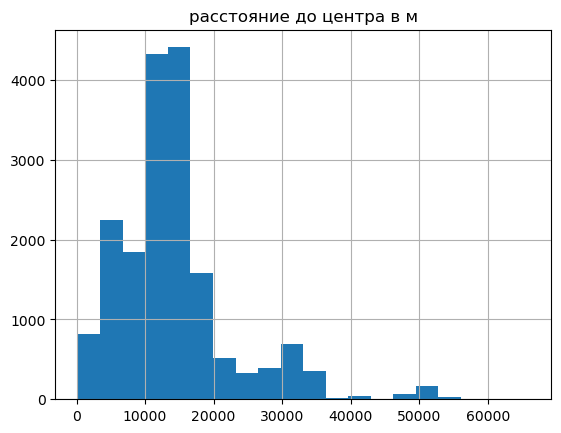

In [86]:
data.hist('расстояние до центра в м', bins=20)
data['расстояние до центра в м'].min()
data['расстояние до центра в м'].max()

10.0

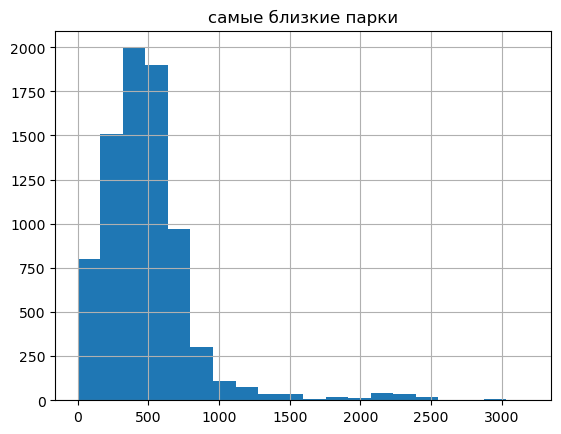

In [87]:
data.hist('самые близкие парки', bins=20)
data.loc[data['самые близкие парки'] < 19, 'самые близкие парки'] = data.loc[data['самые близкие парки'] < 19, 'самые близкие парки'] * 10
data['самые близкие парки'].min()

Были построены гистограммы по отдельным столбикам данных.

В первом столбике график имеет вид Пуассоновского распределения выглядит вполне логичным. Единственное вызвало сомнение максимальное значение в столбике но после проверки максимальной стоимости сомнения отпали.

Второй график имеет так же вид Пуассоновского распределения по логике все графики в дальнейшем с большим количеством разнообразных данных должен иметь данный вид. Сомнения вызвали просадки в районе 20-25 кв м жилой площади но вроде смог притянуть глядя на планировки в интернете что это нормально для 1 комнатной квартиры комната 20-25 кв метров много а для 2 комнатных это мало.

Третий график так же имеет просадку в районе 6-8 метров могу предположить что по тем же самым причинам как и предыдущая гистограмма.

Далее график стоимости жилья график выглядит так же логичным но сомнения появились когда посмотрел минимальную стоимость вопросы остались потому что в посмотрел есть квартиры по такой стоимости. Но не в питере. Есть вероятность что где то в области но это не точно. Оставил под вопросом.

В гистограмме количества комнат были удалены значения где кол-во комнат равно нулю. Сначала я подумал что это может какие то коммуналки или какие то особенные квартиры может какие то комнаты отдельно продающиеся но после серфинга в интернете отмел все варианты и решил удалить потому что медианное значение как мне показалось не совсем подходят.

По графику высоты потолка были выявлены отклонения. Потолки больше 20м были отфильтрованы. По логике потолок в 20м и больше слишком большой даже для квартиры которая стоит 763 миллиона а потолки ниже чем 2м являются не вполне комфортными для жизни поэтому остановился на отметке в 20м.

О типе этажа квартиры если честно то нечего и сказать.

График количества этажей выглядит тоже вполне логичным.

Гистограмма расстояний до центра аналогично выглядит логичной какие то квартиры ближе какие то дальше.

Расстояние до парков. В данном графике была обнаружена аномалия. 1м до парка предполагается что такого не может быть. Поэтому все значения которые меньше 20м были увеличены в 10 раз.

2. Изучим, как быстро продавались квартиры (столбец days_exposition). Этот параметр показывает, сколько дней было размещено каждое объявление.
- Построем гистограмму.
- Посчитаем среднее и медиану.

array([[<Axes: title={'center': 'кол-во дней публикации'}>]], dtype=object)

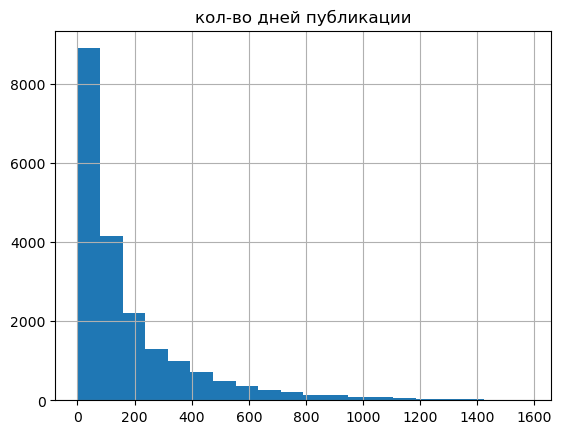

In [91]:
data.hist('кол-во дней публикации', bins=20)

array([[<Axes: title={'center': 'кол-во дней публикации'}>]], dtype=object)

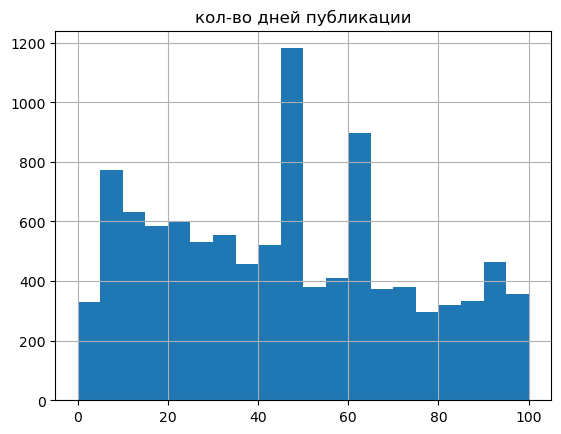

In [92]:
data.hist('кол-во дней публикации', bins=20, range=(0, 100))

In [93]:
data['кол-во дней публикации'].describe().T

count    20149.000000
mean       180.272619
std        218.655965
min          1.000000
25%         45.000000
50%         95.000000
75%        231.000000
max       1580.000000
Name: кол-во дней публикации, dtype: float64

Чаще всего продажи квартиры происходят за 43 и за 60 дней. По описательной статистике можно судить что быстрыми продажами можно считать продажи которые меньше 45 дней. Необычно долгими продажами являются те которые совершены за более чем 232 дня.

3. Определим факторы, которые больше всего влияют на общую (полную) стоимость объекта.
Изучим, зависимость цены от:
- общей площади;
- жилой площади;
- площади кухни;
- количества комнат;
- этажа, на котором расположена квартира (первый, последний, другой);
- даты размещения (день недели, месяц, год).


In [94]:
data.head()

,кол-во изображений,цена,общая площадь,дата публикации,кол-во комнат,высота потолка,кол-во этажей,жилая площадь,этаж,квартира,студия,открытая планировка,кухонная зона,балкон,населенный пункт,ближайшие аэрапорты,расстояние до центра в м,парк в окрестностях 3000,самые близкие парки,пруды в окрестностях 3000,самые близкие пруды,кол-во дней публикации,цена м^2,день публикации,месяц публикации,год публикации,тип этажа квартиры,расстояние до центра в км
0,20,13000000.0,108.0,2019-03-07,3,2.70,16.0,51.0,8,NaN,False,False,25.0,0,Санкт-Петербург,18863.0,16028.0,1,482.0,2,755.0,NaN,120370.37,3,3,2019,другой,16.03
1,7,3350000.0,40.4,2018-12-04,1,NaN,11.0,18.6,1,NaN,False,False,11.0,2,посёлок Шушары,12817.0,18603.0,0,NaN,0,NaN,81.0,82920.79,1,12,2018,первый,18.60
2,10,5196000.0,56.0,2015-08-20,2,NaN,5.0,34.3,4,NaN,False,False,8.3,0,Санкт-Петербург,21741.0,13933.0,1,90.0,2,574.0,558.0,92785.71,3,8,2015,другой,13.93
3,0,64900000.0,159.0,2015-07-24,3,NaN,14.0,NaN,9,NaN,False,False,NaN,0,Санкт-Петербург,28098.0,6800.0,2,84.0,3,234.0,424.0,408176.10,4,7,2015,другой,6.80
4,2,10000000.0,100.0,2018-06-19,2,3.03,14.0,32.0,13,NaN,False,False,41.0,0,Санкт-Петербург,31856.0,8098.0,2,112.0,1,48.0,121.0,100000.00,1,6,2018,другой,8.10


In [95]:
parameters = ['цена', 'общая площадь', 'жилая площадь', 'кухонная зона', 'кол-во комнат', 'тип этажа квартиры'] 
matrix_corr=data[parameters].corr()
matrix_corr

,цена,общая площадь,жилая площадь,кухонная зона,кол-во комнат
цена,1.000000,0.658205,0.539132,0.519537,0.377512
общая площадь,0.658205,1.000000,0.923467,0.564752,0.785527
жилая площадь,0.539132,0.923467,1.000000,0.320487,0.876151
кухонная зона,0.519537,0.564752,0.320487,1.000000,0.193357
кол-во комнат,0.377512,0.785527,0.876151,0.193357,1.000000


Матрица корреляции показывает положительную взаимосвязь цены от общей площади и от жилой площади. Меньшую взаимосвязь на графике можно увидеть между ценой кухонной зоной и ценой и кол-во комнат. Почти нулевая взаимосвяць цены от даты публикации(день недели, месяц, год). 

<Axes: title={'center': 'Зависимость общей площади от стоимости квартиры'}, xlabel='цена'>

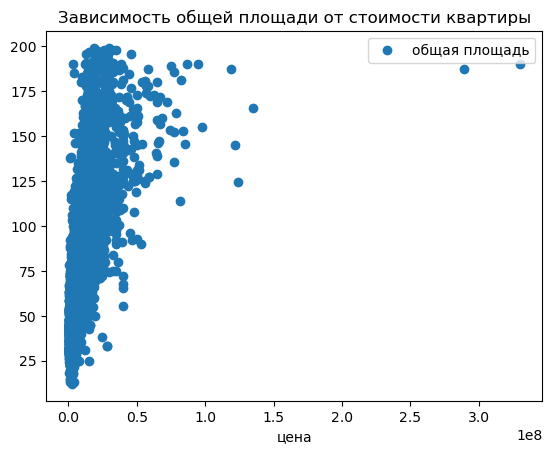

In [96]:
data.plot(x='цена', y='общая площадь', style='o', title=('Зависимость общей площади от стоимости квартиры'))

<Axes: title={'center': 'Зависимость жилой площади от стоимости квартиры'}, xlabel='цена'>

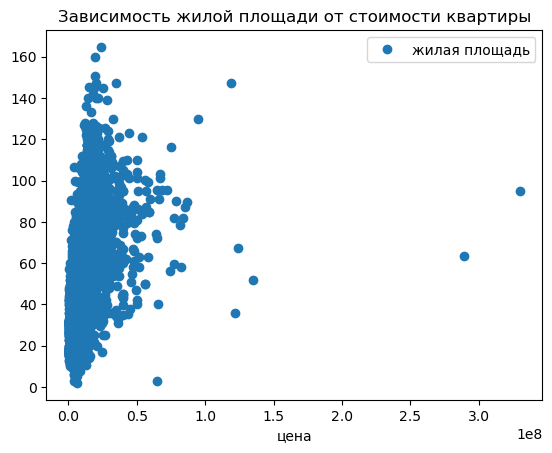

In [97]:
data.plot(x='цена', y='жилая площадь', style='o', title=('Зависимость жилой площади от стоимости квартиры'))

<Axes: title={'center': 'Зависимость кухонной площади от стоимости квартиры'}, xlabel='цена'>

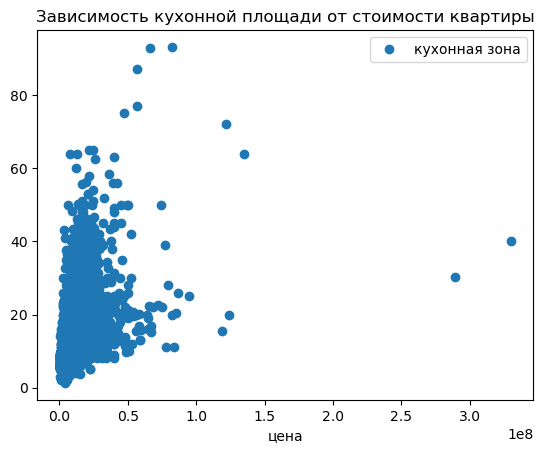

In [98]:
data.plot(x='цена', y='кухонная зона', style='o', title=('Зависимость кухонной площади от стоимости квартиры'))

<Axes: title={'center': 'Зависимость количества комнат от стоимости квартиры'}, xlabel='цена'>

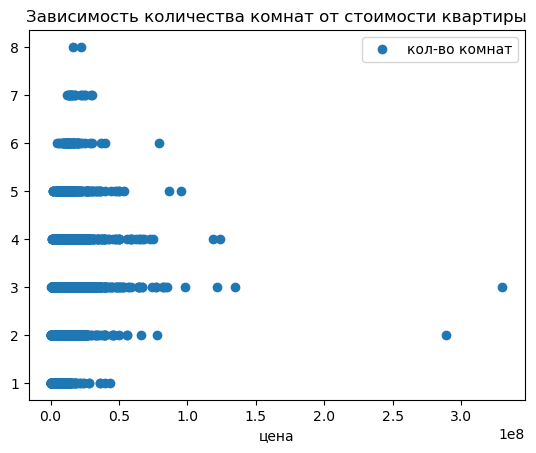

In [99]:
data.plot(x='цена', y='кол-во комнат', style='o', title=('Зависимость количества комнат от стоимости квартиры'))

<Axes: title={'center': 'median'}, xlabel='день публикации'>

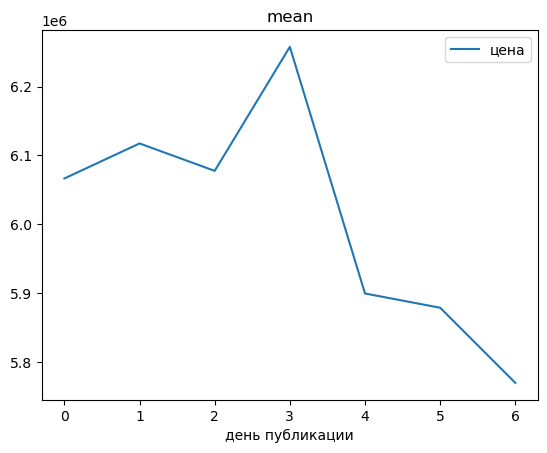

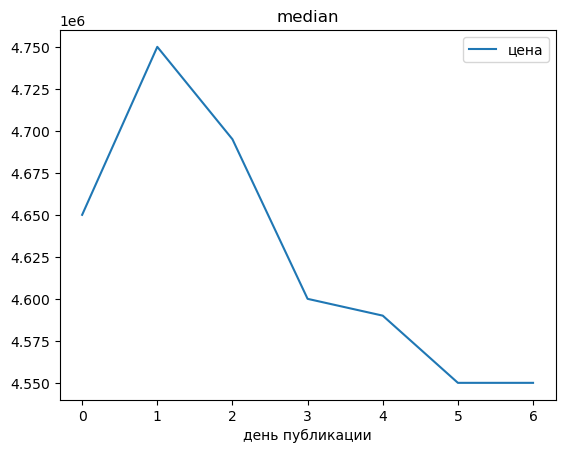

In [100]:
data.pivot_table(index='день публикации',values='цена',aggfunc='mean').plot(y='цена', kind='line', title='mean')
data.pivot_table(index='день публикации',values='цена',aggfunc='median').plot(y='цена', kind='line', title='median')

<Axes: title={'center': 'median'}, xlabel='месяц публикации'>

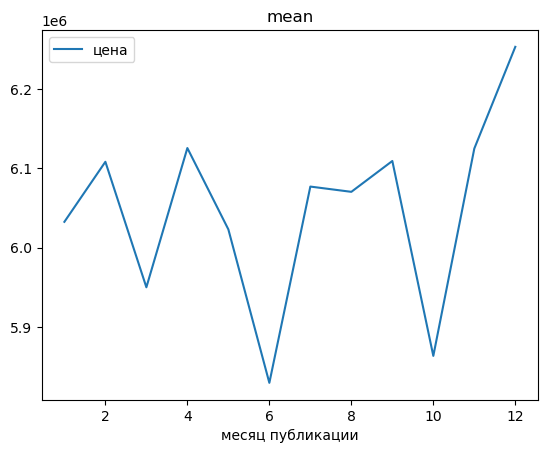

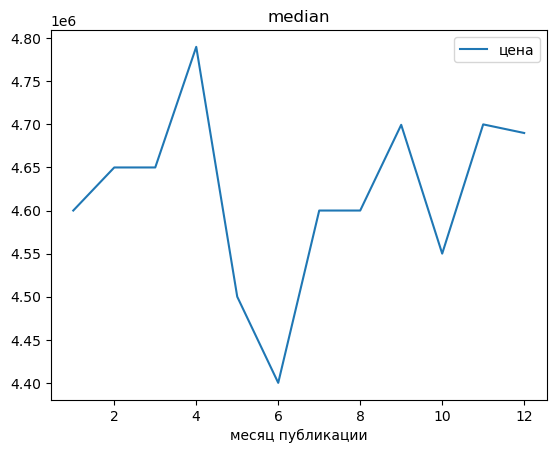

In [101]:
data.pivot_table(index='месяц публикации',values='цена',aggfunc='mean').plot(y='цена', kind='line', title='mean')
data.pivot_table(index='месяц публикации',values='цена',aggfunc='median').plot(y='цена', kind='line', title='median')

<Axes: title={'center': 'median'}, xlabel='год публикации'>

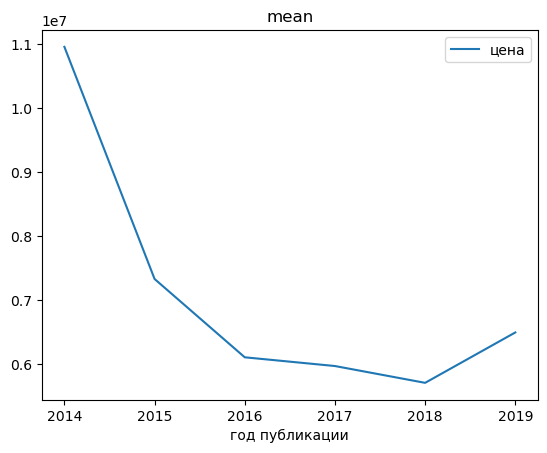

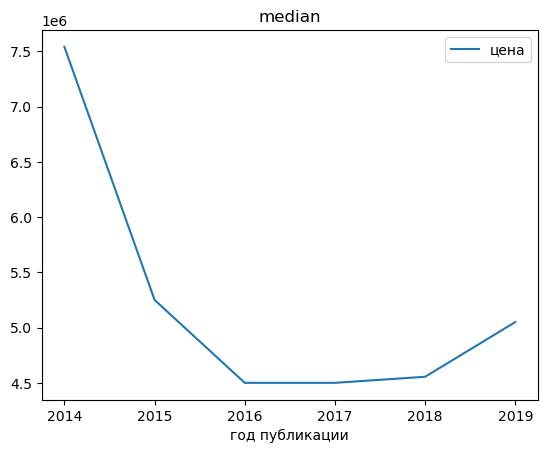

In [102]:
data.pivot_table(index='год публикации',values='цена',aggfunc='mean').plot(y='цена', kind='line', title='mean')
data.pivot_table(index='год публикации',values='цена',aggfunc='median').plot(y='цена', kind='line', title='median')

<Axes: title={'center': 'median'}, xlabel='тип этажа квартиры'>

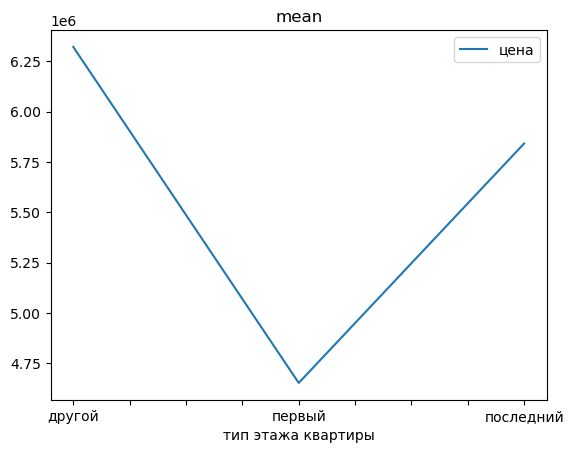

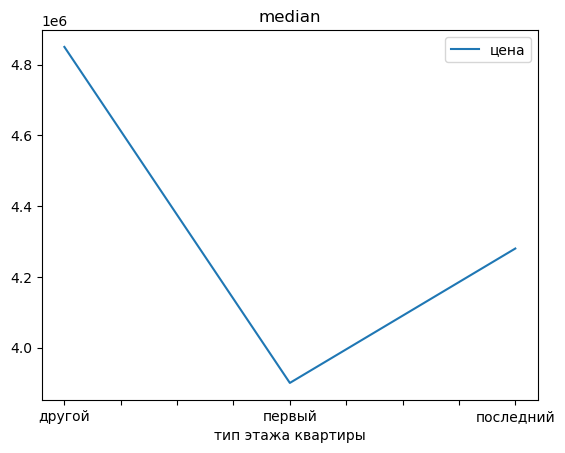

In [103]:
data.pivot_table(index='тип этажа квартиры',values='цена',aggfunc='mean').plot(y='цена', kind='line', title='mean')
data.pivot_table(index='тип этажа квартиры',values='цена',aggfunc='median').plot(y='цена', kind='line', title='median')

4. Посчитаем среднюю цену одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений — построим сводную таблицу с количеством объявлений и средней ценой квадратного метра для этих населенных пунктов. Выделим населённые пункты с самой высокой и низкой стоимостью квадратного метра.

In [104]:
top_10_localities = data['населенный пункт'].value_counts().head(10).index
top_10_localities

Index(['Санкт-Петербург', 'посёлок Мурино', 'Кудрово', 'посёлок Шушары',
       'Всеволожск', 'Пушкин', 'Колпино', 'посёлок Парголово', 'Гатчина',
       'Выборг'],
      dtype='object')

In [105]:
filtered_data = data[data['населенный пункт'].isin(top_10_localities)]
filtered_data

,кол-во изображений,цена,общая площадь,дата публикации,кол-во комнат,высота потолка,кол-во этажей,жилая площадь,этаж,квартира,студия,открытая планировка,кухонная зона,балкон,населенный пункт,ближайшие аэрапорты,расстояние до центра в м,парк в окрестностях 3000,самые близкие парки,пруды в окрестностях 3000,самые близкие пруды,кол-во дней публикации,цена м^2,день публикации,месяц публикации,год публикации,тип этажа квартиры,расстояние до центра в км
0,20,13000000.0,108.00,2019-03-07,3,2.70,16.0,51.0,8,NaN,False,False,25.00,0,Санкт-Петербург,18863.0,16028.0,1,482.0,2,755.0,NaN,120370.37,3,3,2019,другой,16.03
1,7,3350000.0,40.40,2018-12-04,1,NaN,11.0,18.6,1,NaN,False,False,11.00,2,посёлок Шушары,12817.0,18603.0,0,NaN,0,NaN,81.0,82920.79,1,12,2018,первый,18.60
2,10,5196000.0,56.00,2015-08-20,2,NaN,5.0,34.3,4,NaN,False,False,8.30,0,Санкт-Петербург,21741.0,13933.0,1,90.0,2,574.0,558.0,92785.71,3,8,2015,другой,13.93
3,0,64900000.0,159.00,2015-07-24,3,NaN,14.0,NaN,9,NaN,False,False,NaN,0,Санкт-Петербург,28098.0,6800.0,2,84.0,3,234.0,424.0,408176.10,4,7,2015,другой,6.80
4,2,10000000.0,100.00,2018-06-19,2,3.03,14.0,32.0,13,NaN,False,False,41.00,0,Санкт-Петербург,31856.0,8098.0,2,112.0,1,48.0,121.0,100000.00,1,6,2018,другой,8.10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23689,13,3550000.0,35.30,2018-02-28,1,2.86,15.0,16.3,4,NaN,False,False,9.10,2,Санкт-Петербург,17284.0,16081.0,1,353.0,2,652.0,29.0,100566.57,2,2,2018,другой,16.08
23690,3,5500000.0,52.00,2018-07-19,2,NaN,5.0,31.0,2,NaN,False,False,6.00,0,Санкт-Петербург,20151.0,6263.0,1,300.0,0,NaN,15.0,105769.23,3,7,2018,другой,6.26
23691,11,9470000.0,72.90,2016-10-13,2,2.75,25.0,40.3,7,NaN,False,False,10.60,1,Санкт-Петербург,19424.0,4489.0,0,NaN,1,806.0,519.0,129903.98,3,10,2016,другой,4.49
23694,9,9700000.0,133.81,2017-03-21,3,3.70,5.0,73.3,3,NaN,False,False,13.83,0,Санкт-Петербург,24665.0,4232.0,1,796.0,3,381.0,NaN,72490.85,1,3,2017,другой,4.23


In [106]:
average_price_per_sqm = filtered_data.groupby('населенный пункт').agg({'цена м^2': 'mean', 'населенный пункт': 'count'})
average_price_per_sqm

,цена м^2,населенный пункт
населенный пункт,,
Всеволожск,68618.013724,392
Выборг,58141.909325,237
Гатчина,68746.146515,307
Колпино,75333.295816,337
Кудрово,95150.960355,451
Пушкин,103122.538929,364
Санкт-Петербург,113481.920161,15390
посёлок Мурино,85443.035730,562
посёлок Парголово,90448.423416,322


In [107]:
average_price_per_sqm.columns = ['average_price_per_sqm', 'number_of_listings']

In [108]:
highest_price = average_price_per_sqm['average_price_per_sqm'].idxmax()
lowest_price = average_price_per_sqm['average_price_per_sqm'].idxmin()

In [109]:
print(f"Населенный пункт с самой высокой стоимостью квадратного метра: {highest_price}")

Населенный пункт с самой высокой стоимостью квадратного метра: Санкт-Петербург


In [110]:
print(f"Населенный пункт с самой низкой стоимостью квадратного метра: {lowest_price}")

Населенный пункт с самой низкой стоимостью квадратного метра: Выборг


5. Ранее мы посчитали расстояние до центра в километрах. Теперь выделим квартиры в Санкт-Петербурге с помощью столбца locality_name и вычислите их среднюю стоимость на разном удалении от центра. Узнаем среднюю цену квартир в одном километре от центра. Построим график изменения средней цены для каждого километра от центра Петербурга.

In [111]:
spb_data=data[data['населенный пункт'] == 'Санкт-Петербург']
spb_data['населенный пункт'].unique()

array(['Санкт-Петербург'], dtype=object)

In [112]:
average_price_per_km = spb_data.groupby('расстояние до центра в км')['цена'].mean()

<Axes: title={'center': 'median'}, xlabel='расстояние до центра в км'>

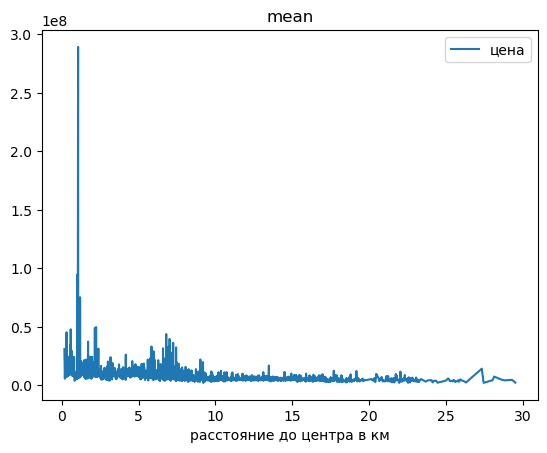

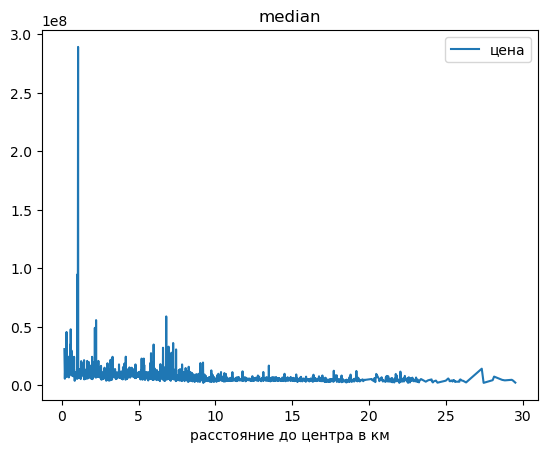

In [113]:
spb_data.pivot_table(index='расстояние до центра в км',values='цена',aggfunc='mean').plot(y='цена', kind='line', title='mean')
spb_data.pivot_table(index='расстояние до центра в км',values='цена',aggfunc='median').plot(y='цена', kind='line', title='median')

In [114]:
average_price_per_km

расстояние до центра в км
0.18     31099000.0
0.21      5800000.0
0.22     10990000.0
0.29     10545000.0
0.32     45455891.0
            ...    
28.64     4775000.0
28.81     4370000.0
29.26     4850000.0
29.34     4200000.0
29.49     2450000.0
Name: цена, Length: 1914, dtype: float64

Вывод:
После анализа данных можно утверждать, что возможно работать с таблицами, содержащими пропущенные значения. Однако рекомендуется очистить данные от явных "выбросов", хотя процесс очистки может потребоваться после этапа исследовательского анализа данных. Например, в нашем случае мы обнаружили дорогие квартиры, которые искажали корреляции и графики зависимости полной стоимости от различных параметров.
Из особенностей данных выявлено следующее:
- В 27 км от центра Санкт-Петербурга недвижимость имеет почти такую же цену, как и в 8 км от центра.
- В ТОП-10 населенных пунктов входят в основном близлежащие к Санкт-Петербургу города и самые крупные города области, такие как Пушкин, Гатчина, Всеволожск и Выборг.
- Цена квартиры в основном зависит от ее площади, однако на графике видна корреляция с этажностью (не первый и не последний этаж).
- Существует большее количество дорогих квартир, которые явно выделяются.

Также были выявлены следующие аномалии:
- Быстрые продажи происходят в течение 95 дней, в то время как необычно долгие продажи - более 181 дня.
- Обнаружены выбросы в количестве объявлений, снятых через 45, 60 и 90 дней.